This notebook is designed to show the extent for which the Gaver-Stehfest Method is effective in calculating the inverse Laplace transform for various orders of the Poisson Distribution 

In this section, we import the necessary modules into python

In [17]:
from scipy.special import binom
import matplotlib.pyplot as plt
import numpy as np
import math
np.seterr(divide = 'ignore',invalid='ignore') #suppresses the divide by zero warning

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

The functions defined are used to calculate the weights in accordance the GS method, the poisson distribution and its laplace transform

In [18]:
def w_k(m,k):
    sum = 0
    for j in range(math.floor((k+1)/2),np.min([m,k])+1):
        sum =sum +np.power(j,m+1)*binom(m,j)*binom(2*j,j)*binom(j,k-j)/math.factorial(m)
    return np.power(-1,m+k)*sum

def poisson(l,k):
    return np.power(l,k)*np.exp(-l)/math.factorial(k)

def lap_trans_poisson(s,k):
    return 1/np.power(s+1,k+1)

The following cell is the "control box" of the notebook. The parameter 'm' denotes how many terms get added in the GS method, while the parameter 'k' denotes the maximum occurance for the poisson distribution to be looped over

In [19]:
m = 7
k = 12

Calculate the required weights and initialize the appropriate arrays

In [20]:
t = np.linspace(0,5)
f_calc = np.zeros(np.size(t))
wk = np.empty(2*m)
for i in range(2*m):
    wk[i] = w_k(m,i+1)

Here we loop over all the occurances to the set maximum to determine where the method starts to break down

<Figure size 432x288 with 0 Axes>

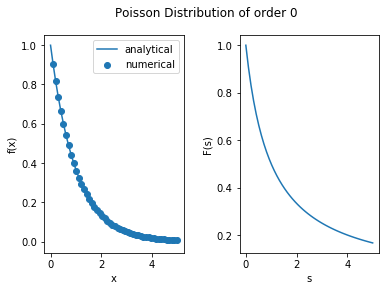

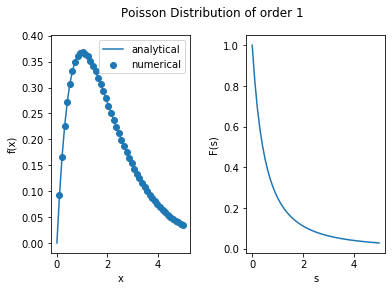

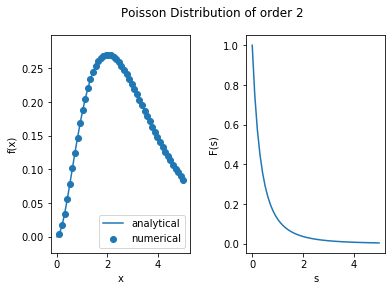

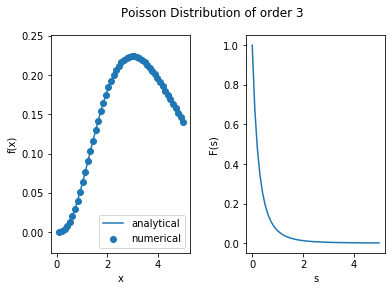

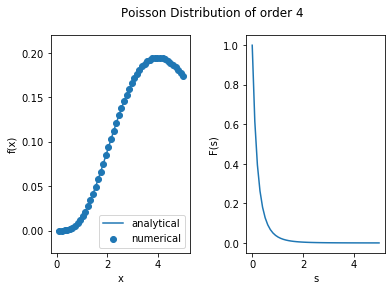

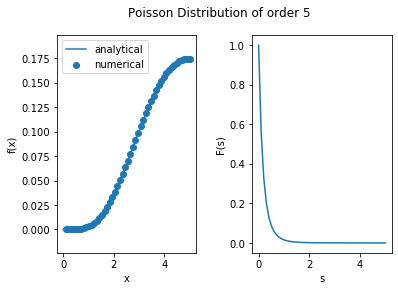

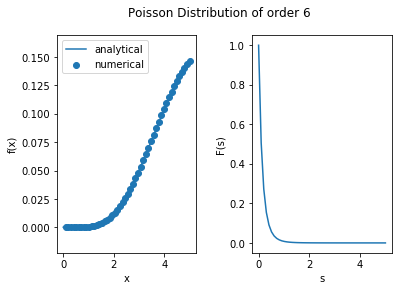

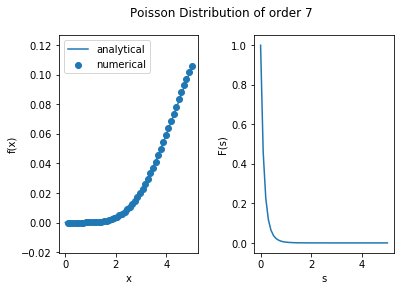

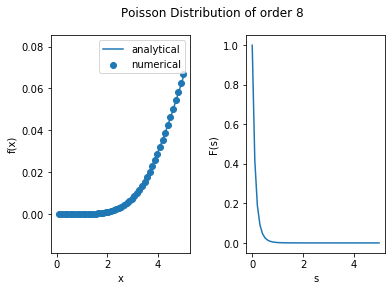

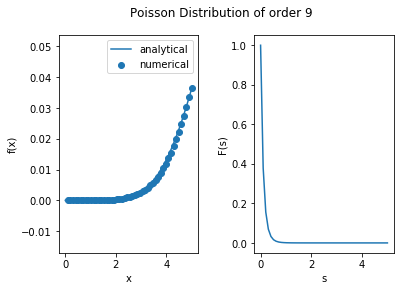

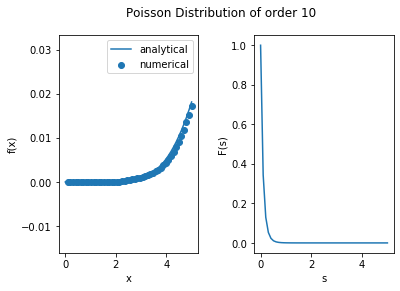

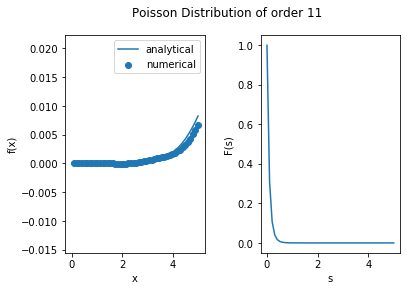

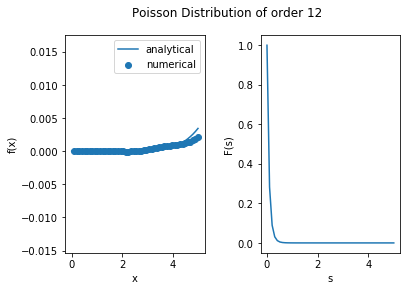

In [21]:
for i in range(0,k+1):
    for j in range(2*m):
        f_calc = f_calc + np.log(2)*wk[j]*lap_trans_poisson((j+1)*np.log(2)/t,i)/t
    plt.figure(i+1)
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.scatter(t,f_calc,label='numerical')
    ax1.plot(t,poisson(t,i),label = 'analytical')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.legend()
    ax2.plot(t,lap_trans_poisson(t,i))
    ax2.set_ylabel('F(s)')
    ax2.set_xlabel('s')
    plt.suptitle('Poisson Distribution of order ' + str(i))
    plt.subplots_adjust(wspace = 0.4)
    #reset the array for the next plot
    f_calc = np.zeros(np.size(t))
plt.show()